In [1]:
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import datetime
import numpy.linalg as la
import math
import numpy as np
from sympy import Symbol, Derivative
%pylab inline
const=150

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('C://Users//Aleksandr//Downloads//Прошлые данные - V (1).csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xcf in position 33: invalid continuation byte

In [3]:
data = data.drop(['Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'], axis = 1)
data.head()

,Дата,Цена
0,19.03.2008,"14,12"
1,20.03.2008,"16,09"
2,24.03.2008,"14,93"
3,25.03.2008,"15,81"
4,26.03.2008,"15,99"


In [4]:
data.tail()

,Дата,Цена
2938,18.11.2019,"179,66"
2939,19.11.2019,"182,77"
2940,20.11.2019,"181,66"
2941,21.11.2019,"179,89"
2942,22.11.2019,"179,47"


In [5]:
#plt.plot(data['Дата'][:50],ta['Цена'][:100])

In [6]:
data.iloc[-1,:]

Дата    22.11.2019
Цена        179,47
Name: 2942, dtype: object

In [7]:
data = data.rename({'Цена':'f', 'Дата': 'ds'}, axis = 'columns')
data['ds'] = pd.to_datetime(data['ds'], format='%d.%m.%Y')
data['y'] = data['f'].apply(lambda x: x.replace(',', '.'))
data['y'] = pd.to_numeric(data['y'])

In [8]:
date1=data['ds'][0]
date2=data['ds'][data.shape[0]-1]
delta=date2-date1
const=delta.days-5
const
#const=data.shape[0]+600

4260

In [9]:
data = data.drop('f', axis = 1)
data.head()


,ds,y
0,2008-03-19,14.12
1,2008-03-20,16.09
2,2008-03-24,14.93
3,2008-03-25,15.81
4,2008-03-26,15.99


In [10]:
type(data.iloc[1, 0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
predictions = 500
train_df = data
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
forecast.shape

(3443, 19)

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-03-19,18.589522,14.849649,23.137115,18.589522,18.589522,0.455617,0.455617,0.455617,0.905098,0.905098,0.905098,-0.449481,-0.449481,-0.449481,0.0,0.0,0.0,19.045140
1,2008-03-20,18.569139,15.145589,23.280348,18.569139,18.569139,0.460294,0.460294,0.460294,0.929691,0.929691,0.929691,-0.469397,-0.469397,-0.469397,0.0,0.0,0.0,19.029433
2,2008-03-24,18.487607,14.995149,22.948629,18.487607,18.487607,0.284170,0.284170,0.284170,0.816756,0.816756,0.816756,-0.532585,-0.532585,-0.532585,0.0,0.0,0.0,18.771777
3,2008-03-25,18.467223,14.803398,22.808260,18.467223,18.467223,0.361742,0.361742,0.361742,0.907590,0.907590,0.907590,-0.545847,-0.545847,-0.545847,0.0,0.0,0.0,18.828966
4,2008-03-26,18.446840,14.823968,23.006933,18.446840,18.446840,0.346469,0.346469,0.346469,0.905098,0.905098,0.905098,-0.558629,-0.558629,-0.558629,0.0,0.0,0.0,18.793310
5,2008-03-27,18.426457,14.681670,22.795817,18.426457,18.426457,0.358595,0.358595,0.358595,0.929691,0.929691,0.929691,-0.571095,-0.571095,-0.571095,0.0,0.0,0.0,18.785052
6,2008-03-28,18.406074,14.745058,23.084580,18.406074,18.406074,0.386104,0.386104,0.386104,0.969431,0.969431,0.969431,-0.583328,-0.583328,-0.583328,0.0,0.0,0.0,18.792178
7,2008-03-31,18.344924,14.338427,22.981861,18.344924,18.344924,0.198735,0.198735,0.198735,0.816756,0.816756,0.816756,-0.618021,-0.618021,-0.618021,0.0,0.0,0.0,18.543659
8,2008-04-01,18.324541,14.478025,22.805687,18.324541,18.324541,0.279367,0.279367,0.279367,0.907590,0.907590,0.907590,-0.628222,-0.628222,-0.628222,0.0,0.0,0.0,18.603908
9,2008-04-02,18.304158,14.497637,22.737695,18.304158,18.304158,0.267943,0.267943,0.267943,0.905098,0.905098,0.905098,-0.637156,-0.637156,-0.637156,0.0,0.0,0.0,18.572101


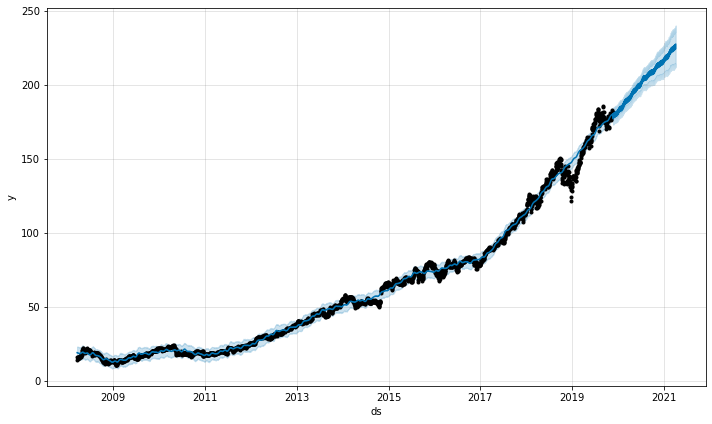

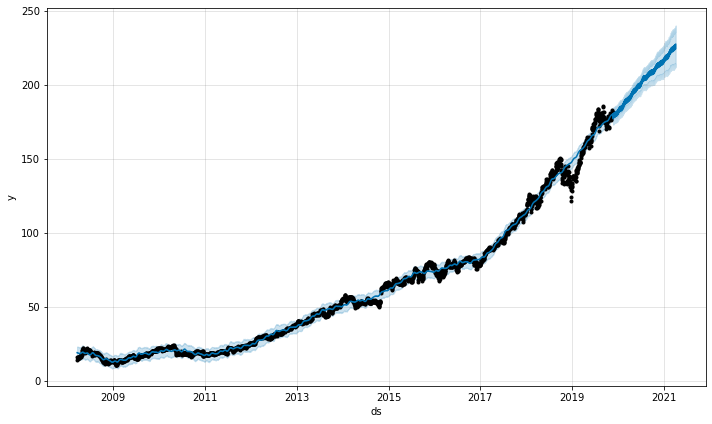

In [14]:
m.plot(forecast)

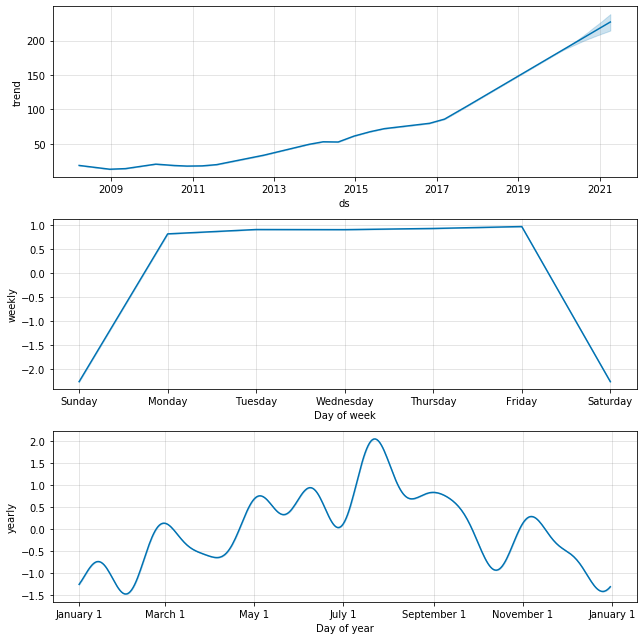

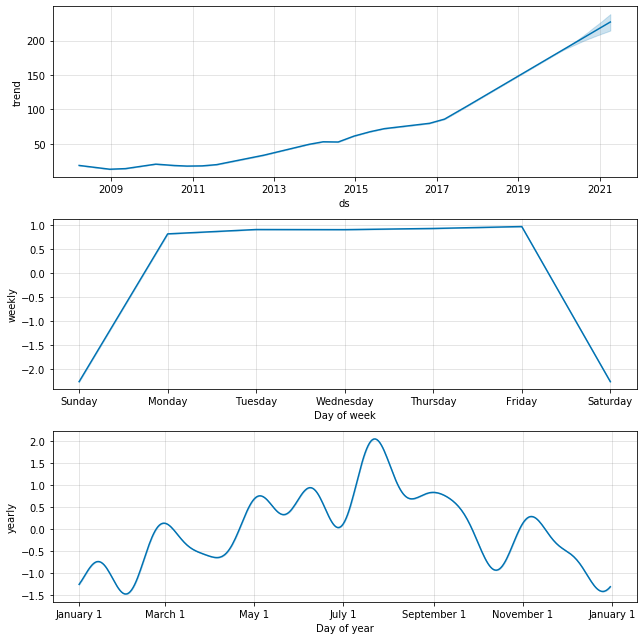

In [15]:
m.plot_components(forecast)

In [16]:
train_data.head()

NameError: name 'train_data' is not defined

In [17]:
mean_squared_error(test_data.y, preds.yhat) / data.y.mean()

NameError: name 'test_data' is not defined

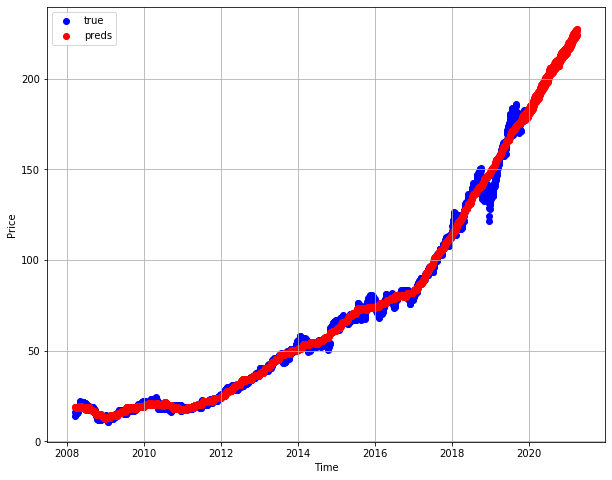

In [18]:
plt.figure(figsize = (10,8))
plt.scatter(data.ds, data.y, c = 'blue', label = 'true')
plt.scatter(forecast.ds, forecast.yhat, c = 'red', label = 'preds')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend(loc = 'best')

In [19]:
# q = pd.DataFrame({'value':data['y'][:const]}, index = data['ds'][:const])
# q.head()
# type(q.iloc[1, 0])

In [20]:
# q.rolling('2s').sum()
# #type(q.iloc[0, 1])

In [21]:
base = datetime.datetime(2008, 3, 19)
date_list = [base + datetime.timedelta(days=x) for x in range(const)]
correct_frame = pd.DataFrame({'ds':date_list})
correct_frame.head()

,ds
0,2008-03-19
1,2008-03-20
2,2008-03-21
3,2008-03-22
4,2008-03-23


In [22]:
final = pd.merge(correct_frame, data, how = 'left', on = 'ds')
final.head()
#final.rolling(10).sum()

,ds,y
0,2008-03-19,14.12
1,2008-03-20,16.09
2,2008-03-21,NaN
3,2008-03-22,NaN
4,2008-03-23,NaN


In [23]:
final1 = final.copy()
final1 = final1.set_index('ds')
#final1.set_index('ds')
final1.head()

,y
ds,
2008-03-19,14.12
2008-03-20,16.09
2008-03-21,NaN
2008-03-22,NaN
2008-03-23,NaN


In [24]:
final2 = final1.rolling(window = '5D').mean()

type(final2.iloc[0, 0])
final2.head()


,y
ds,
2008-03-19,14.120
2008-03-20,15.105
2008-03-21,15.105
2008-03-22,15.105
2008-03-23,15.105


In [25]:
final2.head()

,y
ds,
2008-03-19,14.120
2008-03-20,15.105
2008-03-21,15.105
2008-03-22,15.105
2008-03-23,15.105


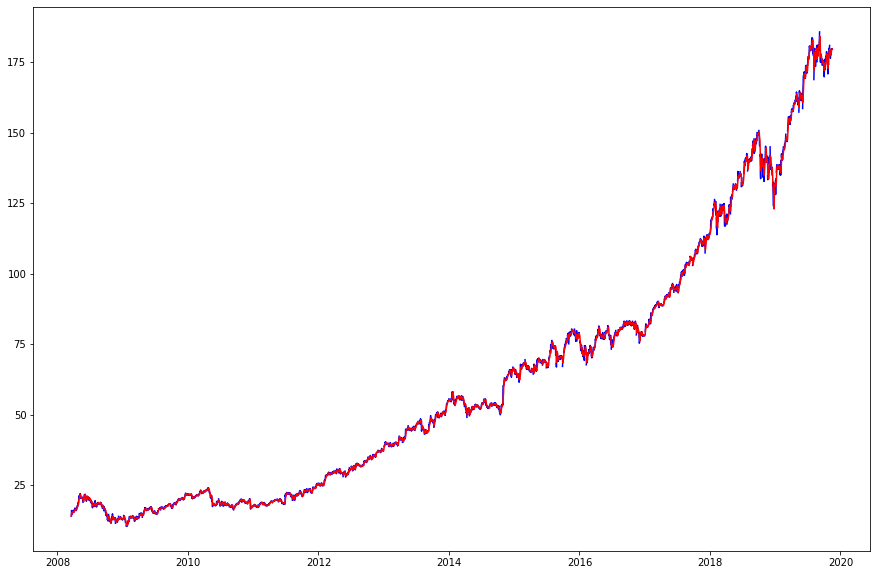

In [26]:
plt.figure(figsize = (15, 10))
plt.plot(final1.index, final1['y'], c = 'blue')
plt.plot(final2.index, final2['y'], c = 'red')# сглаженный 

In [27]:
d = {'col1':final2['y'], 'ds': final2.index}
#q = pd.DataFrame({'value':data['y'][:900]}, index = data['ds'][:900])
#date_list = [base + datetime.timedelta(days=x) for x in range(900)]
index_list = [0 + i for i in range(const)]
last = pd.DataFrame({'y':final2['y'].tolist(), 'ds': final2.index},index = index_list)
last.size
#df_list = df['STYNAME'].tolist()
#massive={last['y'][0:5]}



8520

In [28]:
def get_diff(number,massive):# 
    h=1
    n = 5 #просто количестов точек для вычислений 
    if (number>2) and (number < (massive.size/2)-2) :
        v = np.linspace(-2,2, 5)  #создаем n точек в диопазоне [-l,m], считая . что 0 - точка проведения вячислений 
        u = massive['y'][number-2:number+3].tolist()
    elif (number<3):
        v=np.linspace(0,4,5)
        u = massive['y'][number:number+5].tolist()
    else :
        v=np.linspace(-4,0,5)
        u = massive['y'][number-5:number].tolist()
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    diff=0
    alpha = la.solve(A,b)
    #diff = 1/h*alpha.dot(u.T)
    for i in range(5):
        diff=diff+alpha[i]*u[i]
    return diff
#d=last['y'][0:5].tolist()

In [29]:
#get_diff(40,last)

In [30]:
in_work=pd.DataFrame({'y':final2['y'].tolist(), 'ds': final2.index,'f1':zeros(const),'f2':zeros(const),'integral':zeros(const)},index = index_list)
for i in range(const):
    #if (i>2) and((i<last.size/2)-2):
        in_work['f1'][i]=get_diff(i,last)
   

In [32]:
in_work

,y,ds,f1,f2,integral
0,14.120000,2008-03-19,2.052083,0.0,0.0
1,15.105000,2008-03-20,-0.101250,0.0,0.0
2,15.105000,2008-03-21,0.473750,0.0,0.0
3,15.105000,2008-03-22,-0.033750,0.0,0.0
4,15.105000,2008-03-23,0.247917,0.0,0.0
5,15.510000,2008-03-24,0.137361,0.0,0.0
6,15.370000,2008-03-25,0.001944,0.0,0.0
7,15.576667,2008-03-26,0.153333,0.0,0.0
8,15.615000,2008-03-27,-0.000694,0.0,0.0
9,15.630000,2008-03-28,0.107778,0.0,0.0


In [33]:
def find_moments (u):  
    N = u['y'].size # нужно будет изменить под размеры массива 
    delta=1 # надо подумать , но скорее всего лучше изменить 
    A=np.zeros((N,N))
    f=np.zeros(N)
   
    A[0,0]=1
    A[N-1,N-1]=1

    for i in range(1,N-1): 
            for j in range(N): 
                if i==j : A[i, j]=(delta+delta)/3 # (u[i+1]-u[i-1])/3
                elif i==j+1 : A[i, j]=delta/6 #(u[i+1]-u[i])/6
                elif i==j-1 : A[i ,j]=delta/6 #(u[i]-u[i-1])/6
                f[j]=u['y'][j] #  нужно заполнить столбец решений
    print(A)
    m = la.solve(A,f) #находим столбец решений 
    return m 
    #Теперь можем записать полином на интервале от i до i+1
    # S = 1/(6*(i+1-i))*(m[i]*(i+1-t)**3+m[i+1]*(t-i)**3)+alfa[i](i+1-t)+beta[i](t-i)
    #для того , чтобы найти вторую производную в точке (ctrl+/)
#     for i in range (N-1):
#     alfa[i]=f[i]/(1)-m[i]*1/6
#     beta[i]=f[i+1]/1+m[i+1]*1/6
    # t
    # for i in range(N):
    #     if i<t<=(i+1):
    #         S''(t) =(m[i+1](t-(i))+m[i](i+1-t))/((i+1)-i) 

    # S''(t) =(m[i+1](t-(i))+m[i](i+1-t))/((i+1)-i) 


In [34]:
in_work['f2']=find_moments(last)
m=find_moments(last)
#заполнили вторую производную 
N = in_work['y'].size
alfa=np.zeros(N)
beta=np.zeros(N)
f=in_work['y'].tolist()
#in_work


#дифференцирование ( но оно кривое )    
# x = Symbol('x')
# i=40
# t=40
# function = 1/(6*(i+1-i))*(m[i]*(i+1-x)**3+m[i+1]*(x-i)**3)+alfa[i]*(i+1-x)+beta[i]*(x-i)
# deriv= Derivative(function, x)
# deriv.doit().subs({x:40})

# s=1/6*(m[i]*(-3*(i+1)**2+6*(i+1)*t-3*t**2 ) + m[i+1]*(3*t**2-6*i*t+3*i**2))-alfa[i]-beta[i]
# s

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.16666667 0.66666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.16666667 0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66666667 0.16666667 0.        ]
 [0.         0.         0.         ... 0.16666667 0.66666667 0.16666667]
 [0.         0.         0.         ... 0.         0.         1.        ]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.16666667 0.66666667 0.16666667 ... 0.         0.         0.        ]
 [0.         0.16666667 0.66666667 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.66666667 0.16666667 0.        ]
 [0.         0.         0.         ... 0.16666667 0.66666667 0.16666667]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [35]:

#in_work.to_excel('in_work.xlsx')
def s_our(i,x):
    s=1/6*(m[i]*(i+1-x)**3+m[i+1]*(x-i)**3)+alfa[i]*(i+1-x)+beta[i]*(x-i)
    #print(s)
    return s


In [36]:
#вычислим интеграл
for i in range (N-1):
    alfa[i]=f[i]/(1)-m[i]*1/6
    beta[i]=f[i+1]/1+m[i+1]*1/6
    
for i in range(len(in_work['y'])-1):
    v = np.linspace(i,i+1,11)
    v
    integral=0
    for j in range (10):
        integral+=(s_our(i,v[j])+s_our(i,v[j+1]))/2*0.1
    in_work['integral'][i]=integral

In [37]:
#in_work['y'][2500]
b=1500.2
a=s_our(1500,b)

In [49]:
in_work

,y,ds,f1,f2,integral
0,14.120000,2008-03-19,2.052083,14.120000,15.957944
1,15.105000,2008-03-20,-0.101250,15.371913,16.354961
2,15.105000,2008-03-21,0.473750,15.022347,16.387736
3,15.105000,2008-03-22,-0.033750,15.168701,16.352120
4,15.105000,2008-03-23,0.247917,14.932851,16.664311
5,15.510000,2008-03-24,0.137361,15.729894,16.698425
6,15.370000,2008-03-25,0.001944,15.207571,16.810024
7,15.576667,2008-03-26,0.153333,15.659821,16.908014
8,15.615000,2008-03-27,-0.000694,15.613145,16.932148
9,15.630000,2008-03-28,0.107778,15.577598,17.063589


In [39]:
data1=pd.DataFrame({'y':in_work['f1'].tolist(), 'ds': in_work['ds'].tolist()})
data2=pd.DataFrame({'y':in_work['f2'].tolist(), 'ds': in_work['ds'].tolist()})
data3=pd.DataFrame({'y':in_work['integral'].tolist(), 'ds': in_work['ds'].tolist()})


In [40]:
predictions = 500
train_df = data1
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast1 = m.predict(future)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
train_df = data2
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast2 = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [42]:
train_df.head()

,y,ds
0,14.120000,2008-03-19
1,15.371913,2008-03-20
2,15.022347,2008-03-21
3,15.168701,2008-03-22
4,14.932851,2008-03-23


In [43]:
train_df = data3
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions)
forecast3 = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
forecast1.shape

(4760, 19)

In [45]:
# forecast1 = forecast1.drop(['trend', 'yhat_lower', 'trend_lower', 'additive_terms', 'additive_terms_lower','additive_terms_upper','weekly','weekly_lower','weekly_upper','yearly','yearly_lower','yearly_upper','multiplicative_terms','multiplicative_terms_lower','multiplicative_terms_upper'], axis = 1)
# forecast2 = forecast1.drop(['trend', 'yhat_lower', 'trend_lower', 'additive_terms', 'additive_terms_lower','additive_terms_upper','weekly','weekly_lower','weekly_upper','yearly','yearly_lower','yearly_upper','multiplicative_terms','multiplicative_terms_lower','multiplicative_terms_upper'], axis = 1)
# forecast3 = forecast1.drop(['trend', 'yhat_lower', 'trend_lower', 'additive_terms', 'additive_terms_lower','additive_terms_upper','weekly','weekly_lower','weekly_upper','yearly','yearly_lower','yearly_upper','multiplicative_terms','multiplicative_terms_lower','multiplicative_terms_upper'], axis = 1)


In [46]:
# forecast1=pd.DataFrame({'y':forecast1['yhat'][-500:].tolist(), 'ds': forecast1['ds'][-500:].tolist()})
# forecast2=pd.DataFrame({'y':forecast2['yhat'][-500:].tolist(), 'ds': forecast1['ds'][-500:].tolist()})
# forecast3=pd.DataFrame({'y':forecast3['yhat'][-500:].tolist(), 'ds': forecast1['ds'][-500:].tolist()})


In [47]:
forecast1.to_excel('forecast1_f1.xlsx')
forecast2.to_excel('forecast2_f2.xlsx')
forecast3.to_excel('forecast3_integral.xlsx')

In [48]:
forecast3.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4755,2021-03-26,244.440014,231.996151,255.631849,234.510256,255.064293,-0.438815,-0.438815,-0.438815,0.049195,0.049195,0.049195,-0.488010,-0.488010,-0.488010,0.0,0.0,0.0,244.001199
4756,2021-03-27,244.541868,232.221470,255.760976,234.584199,255.194078,-0.760534,-0.760534,-0.760534,-0.261569,-0.261569,-0.261569,-0.498965,-0.498965,-0.498965,0.0,0.0,0.0,243.781335
4757,2021-03-28,244.643722,231.619741,255.919793,234.654136,255.323864,-0.457700,-0.457700,-0.457700,0.052919,0.052919,0.052919,-0.510618,-0.510618,-0.510618,0.0,0.0,0.0,244.186023
4758,2021-03-29,244.745577,231.952322,255.974181,234.724571,255.453649,-0.484926,-0.484926,-0.484926,0.038206,0.038206,0.038206,-0.523132,-0.523132,-0.523132,0.0,0.0,0.0,244.260651
4759,2021-03-30,244.847431,232.644983,256.158800,234.787890,255.583434,-0.500085,-0.500085,-0.500085,0.036445,0.036445,0.036445,-0.536530,-0.536530,-0.536530,0.0,0.0,0.0,244.347346


In [ ]:
forecast1

In [232]:

# v=np.linspace(-2,2,5)
# A = np.fliplr(np.vander(v, v.size)).T 
# b = np.zeros(5)
# b[1] = 1
# diff=0
# alpha = la.solve(A,b)
# alpha

array([ 8.33333333e-02, -6.66666667e-01, -2.37904934e-16,  6.66666667e-01,
       -8.33333333e-02])